
___
# Punto 2

Reproduciremos el análisis hecho en el notebook `Regresion-Lineal-Scikit-Learn.ipynb` para el dataset de boston completo. El dataset viene por defecto en scikit y la descripción de sus variables se presenta abajo.


## Verificación de los datos
Hemos podido obtener algunos datos de los precios de vivienda de su vecino como un conjunto de csv, ¡preparemos nuestro entorno con las librerias que necesitaremos y luego importemos los datos!
### Importar módulos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
#sns.set_context("paper")

### Verificando los datos

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
print(boston.DESCR)

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Gráficas informativas



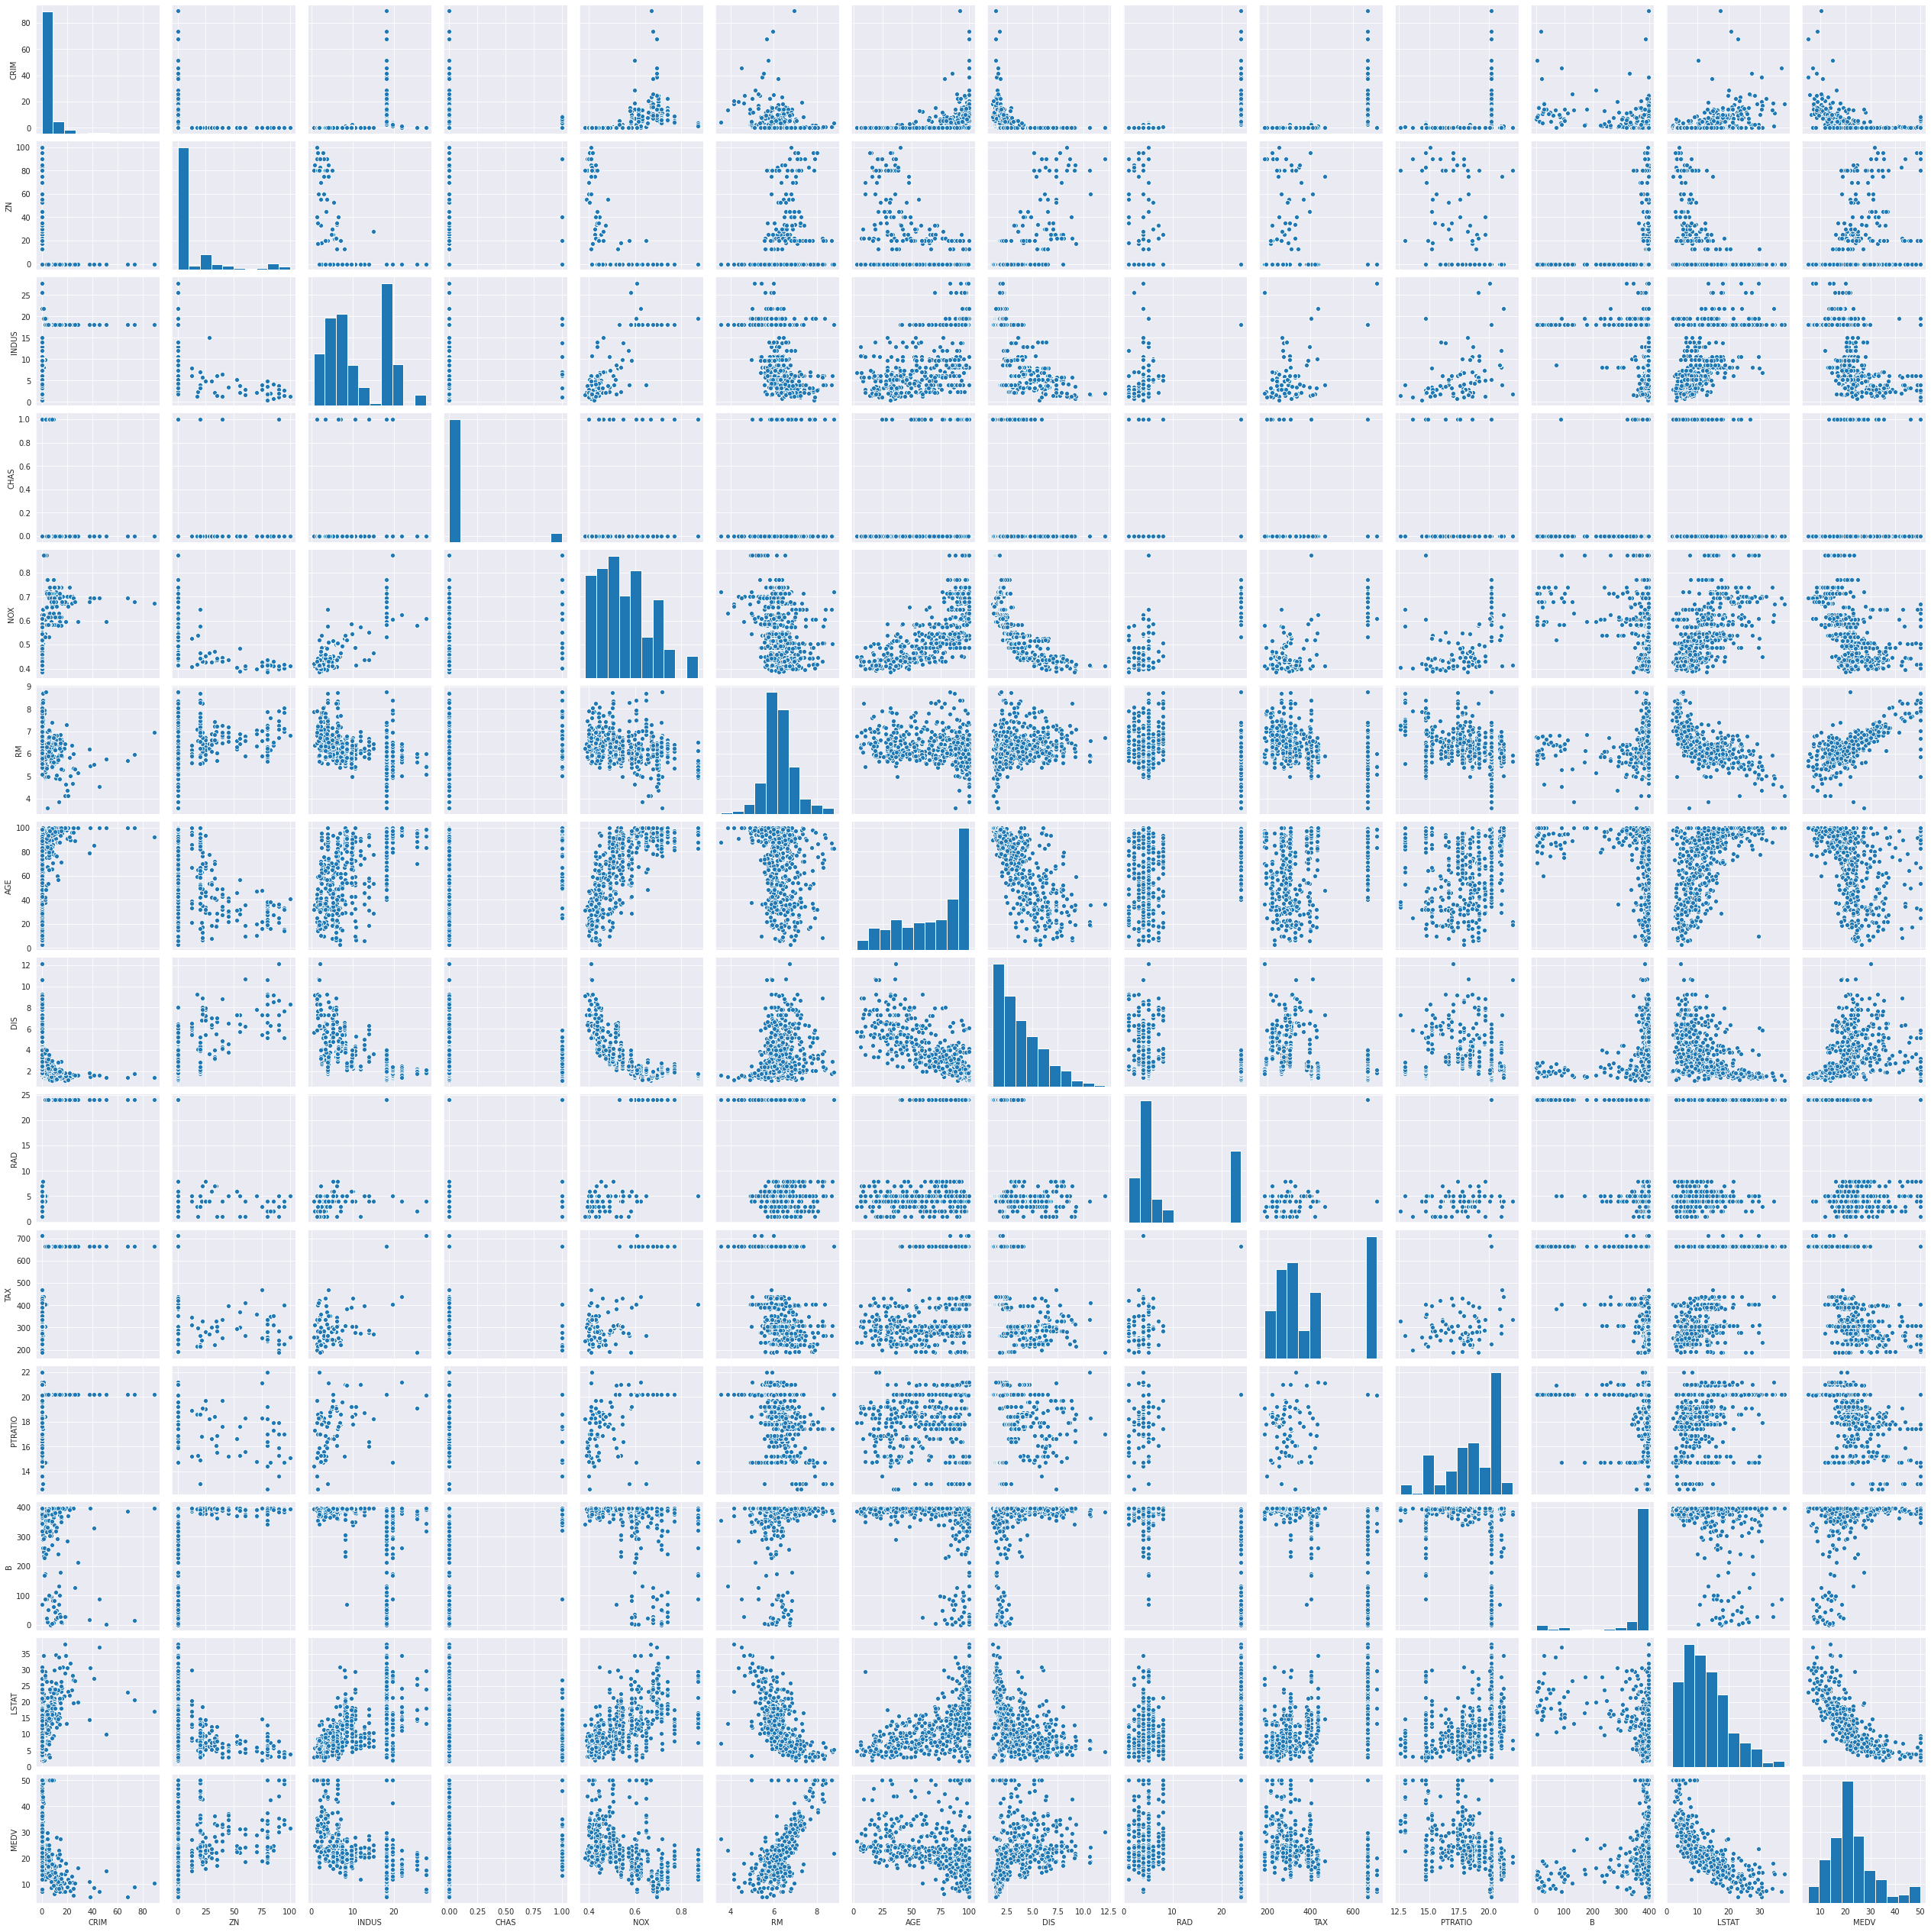

In [8]:
sns.pairplot(df)

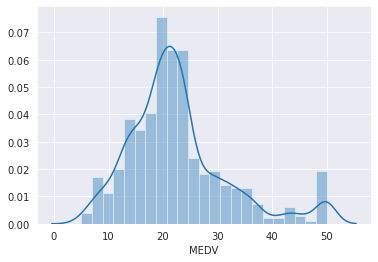

In [9]:
sns.distplot(df['MEDV'])

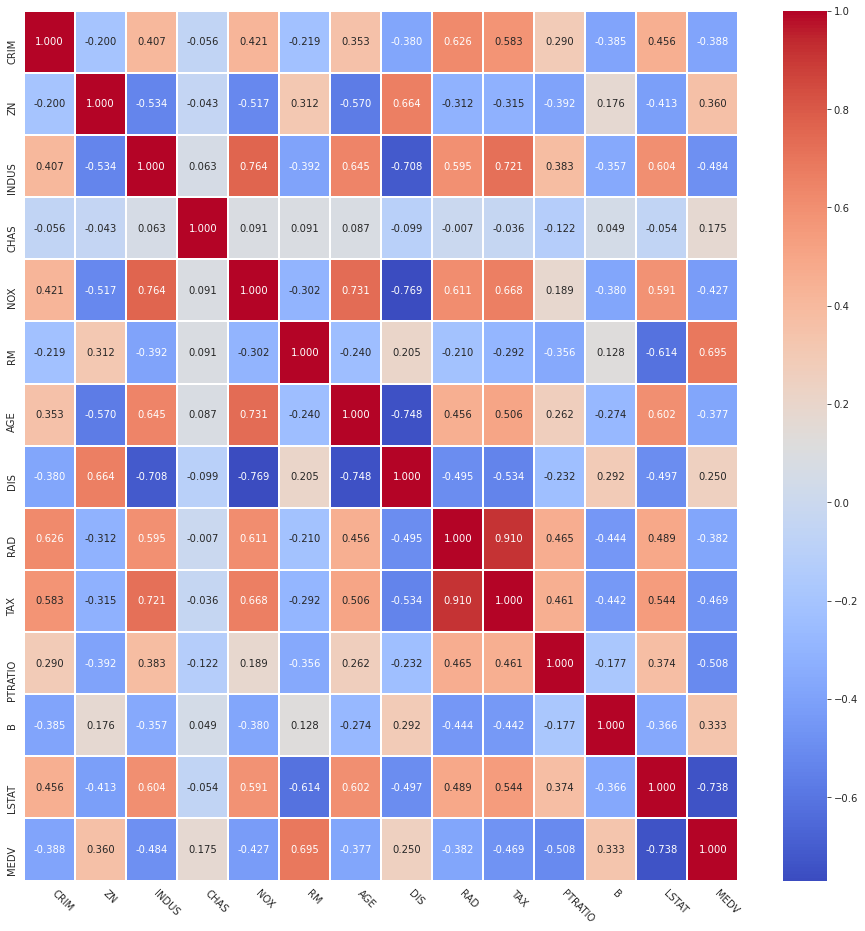

In [22]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, fmt="1.3f", linewidths=1)
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

## Entrenando un modelo de regresión lineal

Tendremos que dividir primero nuestros datos en una matriz X que contenga los descriptores para entrenar, y una matriz con la variable respuesta, en este caso la columna ```MEDV```. 

### X e y

In [24]:
X = df[['CRIM','ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT']]
y = df['MEDV']

## Train Test Split

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Formaremos un modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creando y entrenando el modelo

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Evaluación del modelo

Evaluemos el modelo comprobando sus coeficientes e interpretándolos.

In [31]:
# print the intercept
print(lm.intercept_)

41.28149654473801


In [32]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


Interpretando los coeficientes:


- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **CRIM** se asocia con una **disminución de \$0.077**.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **ZN** se asocia con un **incremento de \$0.042 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **CHAS** se asocia con un **incremento de \$4.134 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **NOX** se asocia con una **disminución de \\$19.976 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **RM** se asocia con un **incremento de \$2.89 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **AGE** se asocia con un **incremento de \$0.016 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **DIS** se asocia con una **disminución de \$1.26 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **RAD** se asocia con un **incremento de \$0.26 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **TAX** se asocia con una **disminución de \$0.011 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **PTRATIO** se asocia con una **disminución de \$0.88 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **B** se asocia con un **incremento de \$0.0070 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **LSTAT** se asocia con una **disminución de \$0.64 **.



## Predicciones usando el modelo

¡Aprovechemos las predicciones de nuestro conjunto de pruebas y veamos qué tan bien lo hizo!

In [33]:
predictions = lm.predict(X_test)

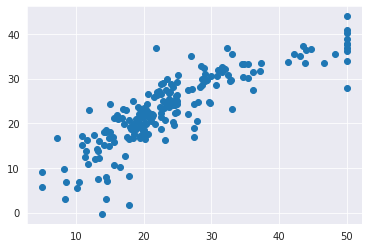

In [34]:
plt.scatter(y_test,predictions)

**Histograma de los residuos**

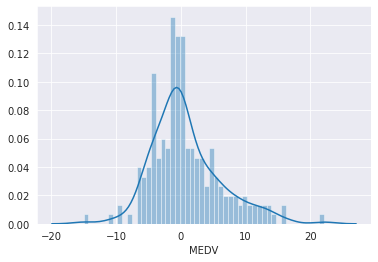

In [35]:
sns.distplot((y_test-predictions),bins=50);

## Evaluación

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
n = y_test.shape[0]

In [37]:
R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test,predictions)
RSE = np.sqrt( MSE*n/(n-2) )

print("R^2 = {:1.3f}".format(R2) )
print("RSE = {:1.3f}".format(RSE))

R^2 = 0.700
RSE = 5.451
